# UNKOWN genotype demography experiment

## Summary

* to be filled
* to install run `pip install git+https://github.com/ctzhu/lifemodels`, assuming a running `python` installation is inplace
* *I have to make WIN32 dynamic libraries, before that the following notebook can only run in MacOX*

In [1]:
import os
#os.chdir('/Users/q6600sl/IPython_NB')
from lifemodels import s_models
%matplotlib inline

## · Read the data and create a survival object using `.survt_df()` method

The only thing I add is the column name for the genotypes ('Genotype')

In [2]:
#Read the data
original_df = pd.read_csv('/Users/q6600sl/Downloads/SP_12-22-15.txt', sep=' ')
#1st step: create a survival object
surv_df    = s_models.survt_df(original_df)

In [3]:
original_df.head()

,Genotype,Time0,Time1
0,WT,0,2
1,WT,0,2
2,Mut-1,0,2
3,Mut-1,0,2
4,Mut-1,0,2


## · Specify the model and create the model fit object using `.distfit_df()` method

In [4]:
gp3_fit    = s_models.distfit_df(surv_df, 'gp3')

In [5]:
gp3_fit.mdl_all_free

,alpha,beta,c,logL,optimizer_flag
Genotype,,,,,
Mut-1,-8.538838,-2.185154,-6.430742,679.274162,0
Mut-12-1,-5.341972,-2.250901,-4.752080,551.716119,0
Mut-12-2,-9.383152,-1.832199,-7.601744,954.244459,0
Mut-12-3,-6.429694,-2.342217,-34.558168,1139.981590,0
Mut-2,-9.890958,-1.887198,-6.820190,641.991652,0
WT,-6.787571,-2.011953,-6.565602,651.463453,0


### · We can get the variance of the parameter estimates
It might not always be there, due to float overflow and underflow problems

In [6]:
gp3_fit.var

,alpha,beta,c
Genotype,,,
Mut-1,0.368075,0.060483,0.343668
Mut-12-1,0.550833,0.159461,0.363832
Mut-12-2,0.372298,0.051876,0.755458
Mut-12-3,NaN,NaN,inf
Mut-2,0.445852,0.058488,0.414629
WT,0.343995,0.073766,0.658950


## · Get the estimated log time-to-reach-%-of-death using `.logq()` method

`.logq(key, q)`, `key` is genotype here. `q` is that target % of death. `q` is default to 50%, therefore by default it returns the estimate for medium lifespan.

`.logq()` method and `.logq_nc()` method are similar: the latter ignores the Makehamm term, if there is one. 

In [7]:
(gp3_fit.logq('Mut-1'), gp3_fit.logq_nc('Mut-1'))

(3.9562204965442995, 3.9751914478113077)

In [8]:
medium_df = pd.DataFrame({'With_C'   : map(gp3_fit.logq, gp3_fit.mdl_all_free.index),
                          'Without_C': map(gp3_fit.logq_nc, gp3_fit.mdl_all_free.index)},
                         index=gp3_fit.mdl_all_free.index)
np.exp(medium_df)

,With_C,Without_C
Genotype,,
Mut-1,52.259438,53.260313
Mut-12-1,25.143313,26.476313
Mut-12-2,44.720688,44.890313
Mut-12-3,39.864938,38.962875
Mut-2,49.901563,50.415500
WT,32.962188,33.061313


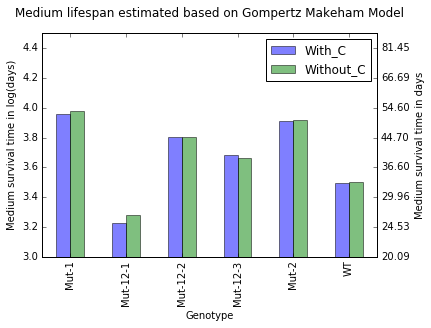

In [9]:
ax = medium_df.plot(kind='bar', alpha=0.5)
ax.set_ylim(3, 4.5)

right_y = ax.twinx()
right_y.set_ylim(3, 4.5)
_ = right_y.set_yticklabels(map('{:.2f}'.format,  np.exp(right_y.get_yticks())))

ax.set_ylabel('Medium survival time in log(days)')
right_y.set_ylabel('Medium survival time in days')
plt.title('Medium lifespan estimated based on Gompertz Makeham Model', y=1.05)

## · Get the estimated log mean lifespan using `.logm()` method

In [10]:
(gp3_fit.logm('Mut-1'), gp3_fit.logm_nc('Mut-1'))

(3.9031295162640411, 3.940987933505439)

## · We can also calculate the variance of time-to-percentage-death estimiates

In [11]:
gp3_fit.logt_var('Mut-1', 3.9)

0.0029731768200757795

## · Plot for parameter estimates

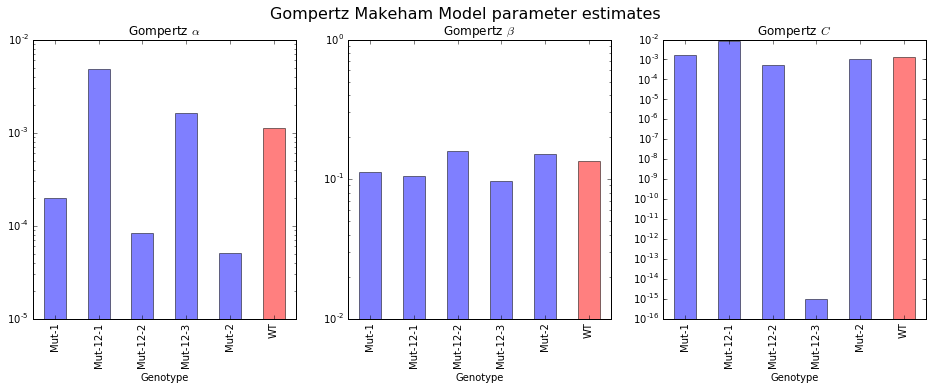

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))

plot_par = {'logy' : True,
            'alpha': 0.5,
            'color': list('BBBBBR')} 

np.exp(gp3_fit.mdl_all_free).ix[:, 'alpha'].plot(kind='bar', ax=ax1, **plot_par)
np.exp(gp3_fit.mdl_all_free).ix[:, 'beta'].plot(kind='bar', ax=ax2, **plot_par)
np.exp(gp3_fit.mdl_all_free).ix[:, 'c'].plot(kind='bar', ax=ax3, **plot_par)

ax1.set_title(r'Gompertz $\alpha$')
ax2.set_title(r'Gompertz $\beta$')
ax3.set_title(r'Gompertz $C$')

plt.suptitle('Gompertz Makeham Model parameter estimates', fontsize=16, y=0.99)

## · Plot harzard plot, survival plot and other plots using `.plot()` method

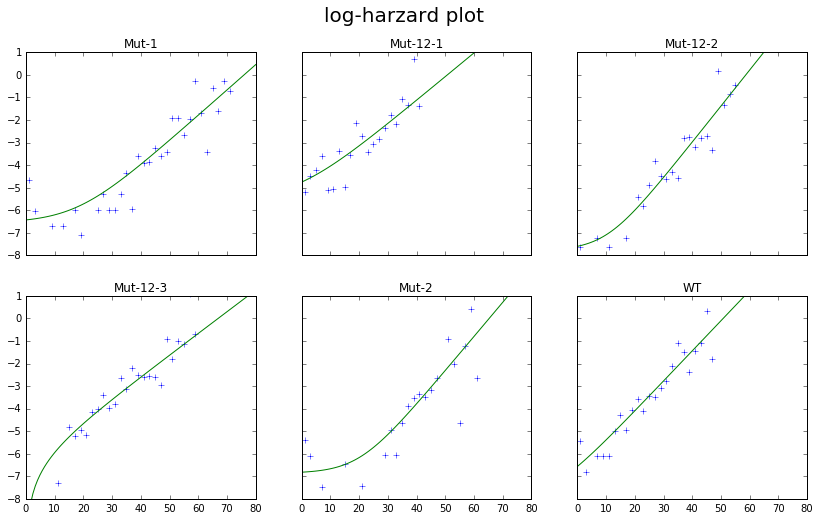

In [13]:
f, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.ravel()
for ax, key in zip(axes, gp3_fit.mdl_all_free.index.tolist()):
    gp3_fit.plot(key, np.linspace(0,80,100),ax,'hzd')
    ax.set_ylim((-8,1))
    ax.set_title(key)
plt.suptitle('log-harzard plot', fontsize=20)

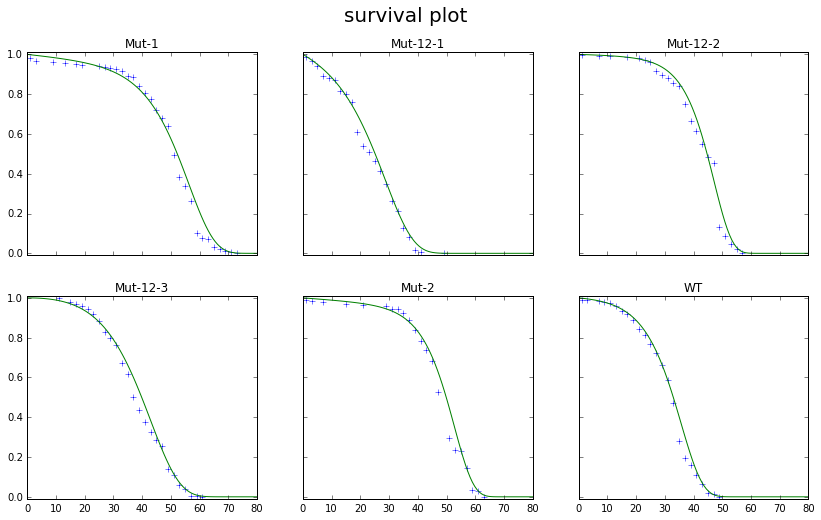

In [14]:
f, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.ravel()
for ax, key in zip(axes, gp3_fit.mdl_all_free.index.tolist()):
    gp3_fit.plot(key, np.linspace(0,80,100),ax,'sf')
    ax.set_ylim((-0.01,1.01))
    ax.set_title(key)
plt.suptitle('survival plot', fontsize=20)